In [6]:
import numpy as np
import pandas as pd 
import os

In [5]:
train_dir = r"C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\Ori\trainOri"
test_dir = r"C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\Ori\testOri"
val_dir = r"C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\Ori\validOri"


In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=20, 
        width_shift_range=0.2,
        height_shift_range=0.2
        )


test_datagen = ImageDataGenerator(rescale=1./255)


# Flow training images in batches of 10 using train_datagen generator

color_mode='grayscale'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical',
        color_mode=color_mode
        )
# Flow validation images in batches of 10 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=10,
        color_mode=color_mode,
        class_mode='categorical')


Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


Visualizing the Data Pre-processing 

In [5]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
image_path = r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\train\Scratches\Sc_10.bmp'


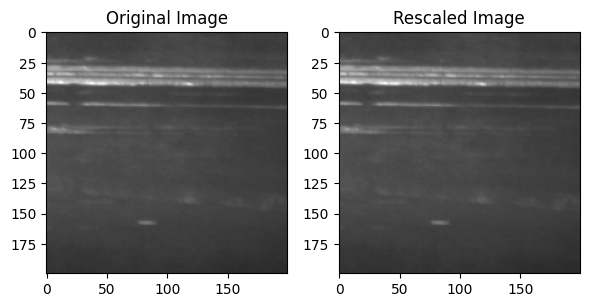

In [12]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#Loads image in from the set image path
img = tf.keras.preprocessing.image.load_img(image_path, target_size= (200,200))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Allows us to properly visualize our image by rescaling values in array
img_tensor /= 255.
#Plots image

# Plot the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

# Plot the rescaled image
plt.subplot(1, 2, 2)
plt.imshow(img_tensor[0])
plt.title("Rescaled Image")

plt.tight_layout()
plt.show()



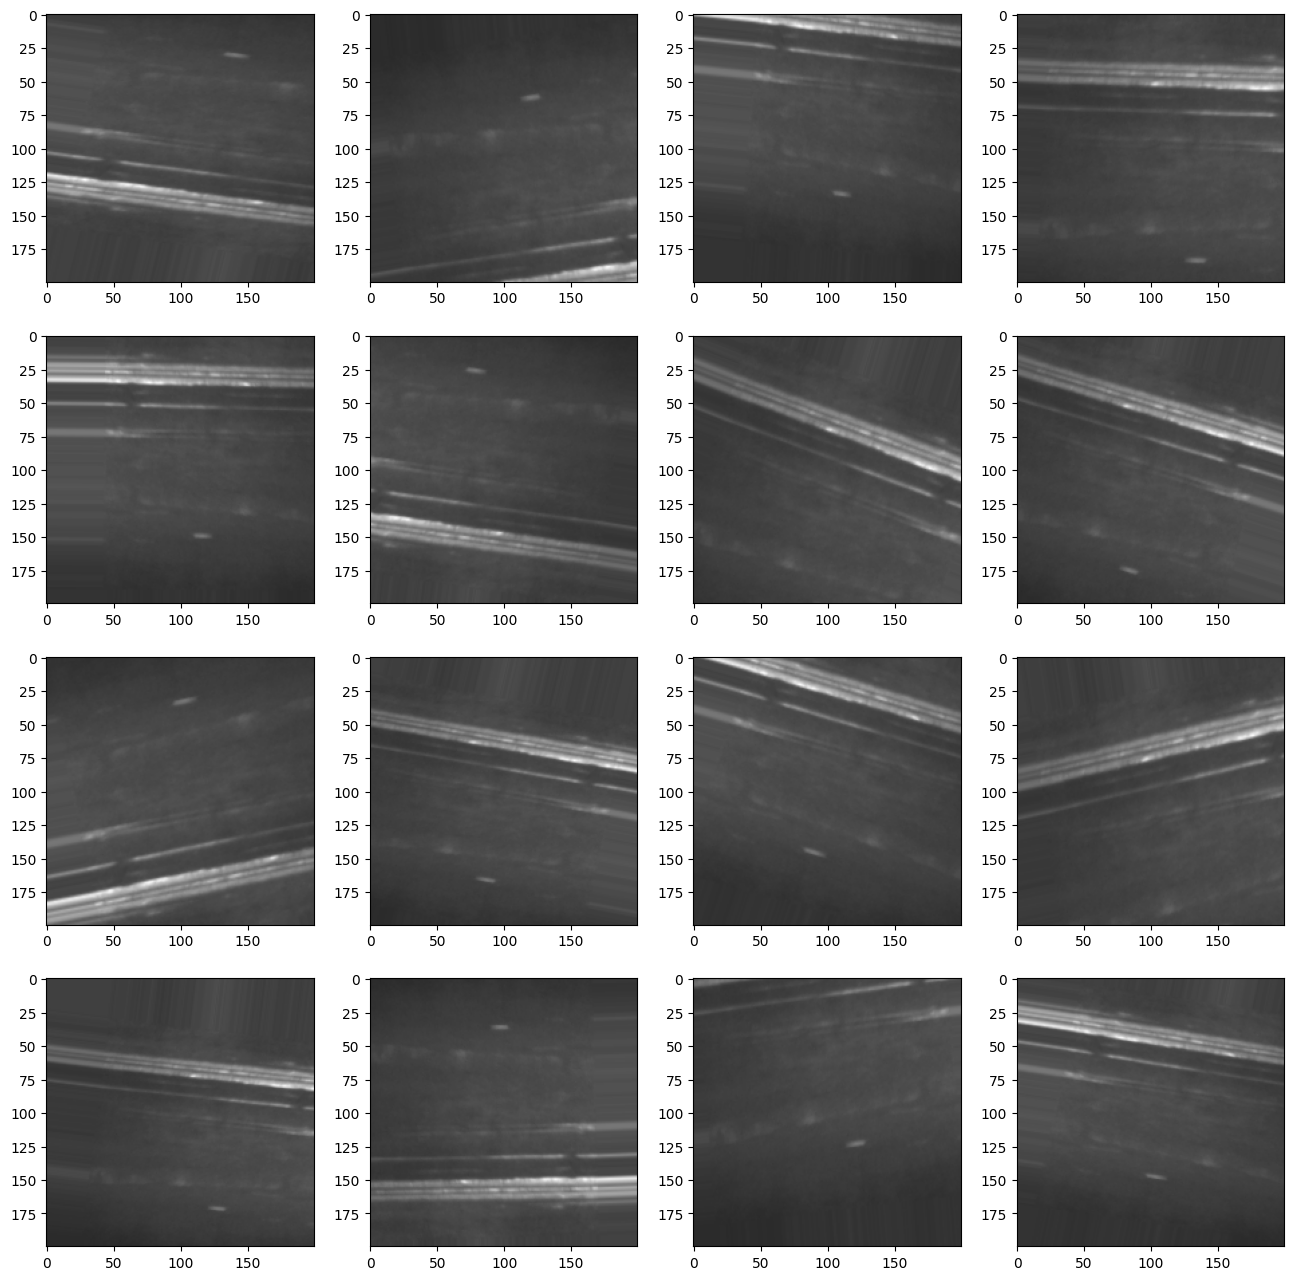

In [8]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size= (200,200))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2
    )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype("uint8")
   plt.imshow(image_)
plt.show()

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [36]:
from tensorflow.keras.regularizers import l2

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 199, 199, 32)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 128)      

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [11]:
# model.compile(optimizer='adam',loss='squared_hinge', metrics = ['accuracy'])

In [38]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=test_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
166/166 [==============================] - 52s 312ms/step - loss: 1.6617 - accuracy: 0.3188 - val_loss: 1.1376 - val_accuracy: 0.5694
Epoch 2/20
166/166 [==============================] - 55s 332ms/step - loss: 1.2423 - accuracy: 0.5386 - val_loss: 0.8648 - val_accuracy: 0.6806
Epoch 3/20
166/166 [==============================] - 54s 328ms/step - loss: 0.9685 - accuracy: 0.6449 - val_loss: 1.5363 - val_accuracy: 0.3750
Epoch 4/20
166/166 [==============================] - 54s 325ms/step - loss: 0.7772 - accuracy: 0.7204 - val_loss: 0.5394 - val_accuracy: 0.8333
Epoch 5/20
166/166 [==============================] - 54s 327ms/step - loss: 0.6713 - accuracy: 0.7778 - val_loss: 0.4940 - val_accuracy: 0.8333
Epoch 6/20
166/166 [==============================] - 55s 332ms/step - loss: 0.5894 - accuracy: 0.8025 - val_loss: 0.3209 - val_accuracy: 0.8889
Epoch 7/20
166/166 [==============================] - 54s 327ms/step - loss: 0.5083 - accuracy: 0.8297 - val_loss: 0.2812 - val_ac

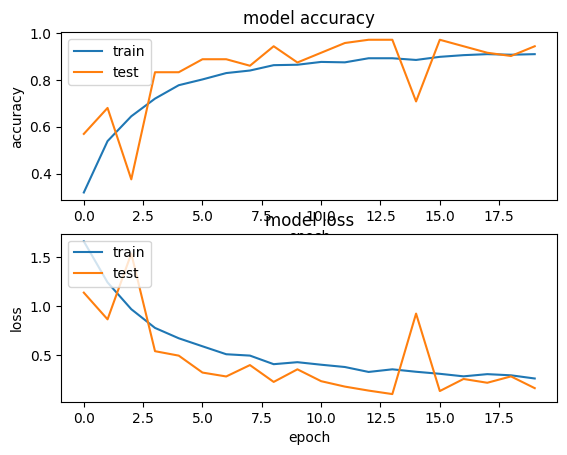

In [39]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [5]:
modelAdam = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')

])

modelAdam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0

In [6]:
modelAdam.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [9]:
callbacks = myCallback()
historyAdam = modelAdam.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=test_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
166/166 [==============================] - 73s 434ms/step - loss: 1.6542 - accuracy: 0.3152 - val_loss: 1.3088 - val_accuracy: 0.5556
Epoch 2/20
166/166 [==============================] - 65s 388ms/step - loss: 1.2687 - accuracy: 0.5091 - val_loss: 0.9019 - val_accuracy: 0.7639
Epoch 3/20
166/166 [==============================] - 56s 336ms/step - loss: 0.8013 - accuracy: 0.7083 - val_loss: 0.6184 - val_accuracy: 0.7361
Epoch 4/20
166/166 [==============================] - 56s 339ms/step - loss: 0.5672 - accuracy: 0.8068 - val_loss: 0.6057 - val_accuracy: 0.7083
Epoch 5/20
166/166 [==============================] - 56s 335ms/step - loss: 0.4762 - accuracy: 0.8357 - val_loss: 0.3092 - val_accuracy: 0.9028
Epoch 6/20
166/166 [==============================] - 56s 334ms/step - loss: 0.3532 - accuracy: 0.8774 - val_loss: 0.4909 - val_accuracy: 0.7917
Epoch 7/20
166/166 [==============================] - 58s 352ms/step - loss: 0.3686 - accuracy: 0.8690 - val_loss: 0.2536 - val_ac

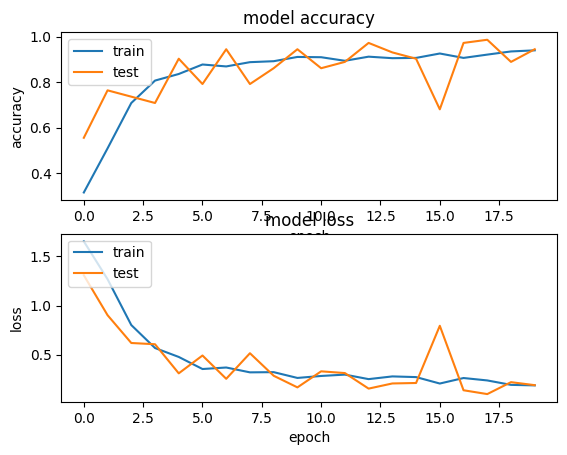

In [10]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(historyAdam.history['accuracy'])  
plt.plot(historyAdam.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(historyAdam.history['loss'])  
plt.plot(historyAdam.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [18]:
modelAdam.save("cnn.keras")

new_model = tf.keras.models.load_model('cnn.keras')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0

In [40]:
model.save("cnn.keras")


In [41]:
model.save("cnn.keras")

new_model = tf.keras.models.load_model('cnn.keras')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 199, 199, 32)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 128)      

In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)

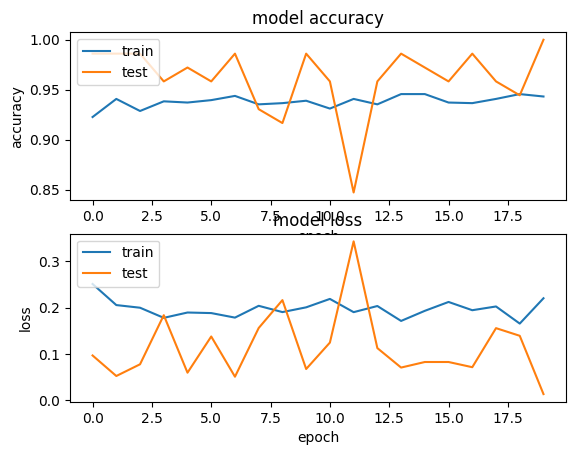

In [43]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

SVM

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras import models

# feature_extractor = Model(inputs=new_model.input, outputs=new_model.layers[-3].output)
# feature_extractor = Model(inputs=new_model.input, outputs=output)
# Get the index of the flatten layer
# feature_extraction_layer_index = new_model.layers.index(new_model.get_layer('flatten'))
chosen_layer_index = 5
# Create a new model that includes only the layers up to the before  layer
feature_extraction_model = models.Model(inputs=model.inputs, 
                                        outputs=model.layers[chosen_layer_index].output)

# # Display the summary of the new model
feature_extraction_model.summary()
# Example input data (replace with your actual data)
input_data = np.random.rand(200, 200, 1)
# Extract features and encode labels
# train_features = feature_extraction_model.predict(train_generator)
# train_features = train_features.reshape(train_features.shape[0], -1)  # Reshape features



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 200, 200, 1)]     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 199, 199, 32)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                           

In [10]:
from sklearn.svm import SVC

BATCHES_IN_EPOCH=48
BATCH_SIZE=10
# Initialize arrays for training features and labels
train_features_cnn = []
train_labels_cnn = []

# Load training data from the generator
for i in range(BATCHES_IN_EPOCH):
    train_data = train_generator.next()
    
    # Extract features from the chosen layer
    features_batch = feature_extraction_model.predict(train_data[0])

    # Flatten the features and convert labels
    for j in range(BATCH_SIZE):
        flattened_features = features_batch[j].flatten()
        train_features_cnn.append(flattened_features)
        train_labels_cnn.append(np.argmax(train_data[1][j]))

# Convert lists to NumPy arrays
train_features_cnn = np.array(train_features_cnn)
train_labels_cnn = np.array(train_labels_cnn)

# # Initialize SVM classifier
# clf = SVC(kernel='linear', C=0.1)

# # Train SVM classifier
# clf.fit(train_features_cnn, train_labels_cnn)


1/1 [==============================] - 0s 81ms/step


In [353]:
print(train_features_cnn)

[[0.         0.         0.         ... 0.09067989 0.04564378 0.00284975]
 [0.         0.         0.         ... 0.05379743 0.02613713 0.00171754]
 [0.         0.         0.         ... 0.058644   0.0292736  0.00191408]
 ...
 [0.         0.         0.         ... 0.08288196 0.04164743 0.00279953]
 [0.         0.         0.         ... 0.18213022 0.08860257 0.00314309]
 [0.         0.         0.         ... 0.05652297 0.02768361 0.00211562]]


In [355]:
train_labels_cnn

array([4, 1, 5, 4, 0, 3, 4, 2, 3, 3, 2, 3, 0, 4, 0, 5, 2, 1, 3, 4, 5, 4,
       1, 3, 3, 2, 4, 3, 1, 4, 2, 1, 4, 4, 1, 3, 0, 4, 5, 1, 1, 1, 0, 5,
       2, 5, 4, 3, 4, 4, 1, 2, 5, 0, 5, 2, 2, 3, 5, 2, 0, 4, 1, 0, 5, 5,
       1, 0, 1, 0, 3, 3, 2, 5, 5, 1, 0, 2, 4, 2, 4, 1, 5, 3, 0, 0, 1, 5,
       1, 4, 2, 2, 4, 3, 5, 5, 3, 2, 2, 5, 1, 2, 0, 0, 3, 5, 0, 5, 5, 0,
       4, 4, 1, 3, 4, 4, 1, 3, 4, 2, 5, 2, 2, 1, 5, 0, 5, 1, 1, 3, 0, 1,
       0, 0, 0, 0, 2, 1, 3, 5, 2, 0, 5, 0, 5, 5, 4, 3, 3, 5, 0, 0, 0, 1,
       4, 5, 4, 3, 1, 4, 0, 5, 1, 4, 0, 4, 2, 0, 2, 2, 0, 4, 3, 2, 2, 4,
       3, 1, 0, 3, 4, 3, 5, 4, 2, 5, 1, 4, 4, 2, 0, 5, 0, 2, 4, 1, 2, 0,
       0, 4, 1, 3, 4, 2, 2, 5, 2, 2, 5, 5, 1, 5, 1, 4, 5, 2, 3, 1, 4, 2,
       0, 2, 1, 5, 1, 0, 1, 2, 4, 3, 4, 1, 2, 0, 5, 3, 2, 5, 0, 3, 0, 0,
       0, 3, 2, 3, 4, 3, 3, 1, 2, 4, 5, 5, 3, 5, 1, 0, 1, 5, 0, 0, 0, 5,
       3, 5, 3, 0, 4, 2, 0, 3, 5, 1, 1, 4, 3, 0, 3, 1, 1, 0, 1, 1, 4, 0,
       4, 1, 4, 4, 2, 3, 2, 5, 3, 1, 3, 5, 4, 0, 3,

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import numpy as np

# # Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_cnn)

# Load test data from the generator
test_data = test_generator.next()
test_features = feature_extraction_model.predict(test_data[0]).reshape((BATCH_SIZE, -1))
test_labels = np.argmax(test_data[1], axis=1)

# Calculate class weights to handle imbalanced classes
# class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels_encoded), train_labels_encoded)

# Initialize and train the SVM classifier
clf = SVC(kernel="rbf",gamma=1, degree=3, class_weight='balanced')
# clf = SVC(kernel="linear", class_weight='balanced')

clf.fit(train_features_cnn, train_labels_encoded)
# training_time = time.time() - initial_time
# print("\nTraining Time = ", training_time)

# Make predictions on the test set
predictions = clf.predict(test_features)

# Calculate accuracy
accuracy = np.mean(predictions == test_labels)

print("\n Rbf kernel SVM accuracy =", accuracy)

# Make predictions on the training set
train_predictions = clf.predict(train_features_cnn)

# Calculate accuracy on training data
train_accuracy = np.mean(train_predictions == train_labels_encoded)

print("\n Kernel SVM accuracy on training data =", train_accuracy)

1/1 [==============================] - 0s 54ms/step

 Rbf kernel SVM accuracy = 0.6

 Kernel SVM accuracy on training data = 0.9916666666666667


In [55]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import numpy as np

# # Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_cnn)

# Load test data from the generator
test_data = test_generator.next()
test_features = feature_extraction_model.predict(test_data[0]).reshape((BATCH_SIZE, -1))
test_labels = np.argmax(test_data[1], axis=1)

# Calculate class weights to handle imbalanced classes
# class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels_encoded), train_labels_encoded)

# Initialize and train the SVM classifier
# clf = SVC(kernel="rbf",gamma=1, degree=3, class_weight='balanced')
clf = SVC(kernel="linear", class_weight='balanced')

clf.fit(train_features_cnn, train_labels_encoded)
# training_time = time.time() - initial_time
# print("\nTraining Time = ", training_time)

# Make predictions on the test set
predictions = clf.predict(test_features)

# Calculate accuracy
accuracy = np.mean(predictions == test_labels)

print("\n Linear kernel SVM accuracy =", accuracy)

# Make predictions on the training set
train_predictions = clf.predict(train_features_cnn)

# Calculate accuracy on training data
train_accuracy = np.mean(train_predictions == train_labels_encoded)

print("\n Kernel SVM accuracy on training data =", train_accuracy)

1/1 [==============================] - 0s 59ms/step

 Linear kernel SVM accuracy = 1.0

 Kernel SVM accuracy on training data = 0.96875


In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import numpy as np

# # Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_cnn)

# Load test data from the generator
test_data = test_generator.next()
test_features = feature_extraction_model.predict(test_data[0]).reshape((BATCH_SIZE, -1))
test_labels = np.argmax(test_data[1], axis=1)

# Calculate class weights to handle imbalanced classes
# class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels_encoded), train_labels_encoded)

# Initialize and train the SVM classifier
# clf = SVC(kernel="rbf",gamma=1, degree=3, class_weight='balanced')
clf = SVC(kernel="linear", C=0.9,class_weight='balanced')

clf.fit(train_features_cnn, train_labels_encoded)
# training_time = time.time() - initial_time
# print("\nTraining Time = ", training_time)

# Make predictions on the test set
predictions = clf.predict(test_features)

# Calculate accuracy
accuracy = np.mean(predictions == test_labels)

print("\nLinear kernel SVM accuracy =", accuracy)

# Make predictions on the training set
train_predictions = clf.predict(train_features_cnn)

# Calculate accuracy on training data
train_accuracy = np.mean(train_predictions == train_labels_encoded)

print("\n Kernel SVM accuracy on training data =", train_accuracy)

1/1 [==============================] - 0s 88ms/step

Linear kernel SVM accuracy = 0.9

 Kernel SVM accuracy on training data = 0.9604166666666667


ADAM OPTIMIZER

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras import models

# feature_extractor = Model(inputs=new_model.input, outputs=new_model.layers[-3].output)
# feature_extractor = Model(inputs=new_model.input, outputs=output)
# Get the index of the flatten layer
# feature_extraction_layer_index = new_model.layers.index(new_model.get_layer('flatten'))
chosen_layer_index = 5
# Create a new model that includes only the layers up to the before  layer
feature_extraction_modelAdam = models.Model(inputs=modelAdam.inputs, 
                                        outputs=modelAdam.layers[chosen_layer_index].output)

# # Display the summary of the new model
feature_extraction_modelAdam.summary()
# Example input data (replace with your actual data)
input_data = np.random.rand(200, 200, 1)
# Extract features and encode labels
# train_features = feature_extraction_model.predict(train_generator)
# train_features = train_features.reshape(train_features.shape[0], -1)  # Reshape features



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 200, 200, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 199, 199, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       3289

In [24]:
from sklearn.svm import SVC

BATCHES_IN_EPOCH=48
BATCH_SIZE=10
# Initialize arrays for training features and labels
train_features_cnn = []
train_labels_cnn = []

# Load training data from the generator
for i in range(BATCHES_IN_EPOCH):
    train_data = train_generator.next()
    
    # Extract features from the chosen layer
    features_batch = feature_extraction_modelAdam.predict(train_data[0])

    # Flatten the features and convert labels
    for j in range(BATCH_SIZE):
        flattened_features = features_batch[j].flatten()
        train_features_cnn.append(flattened_features)
        train_labels_cnn.append(np.argmax(train_data[1][j]))

# Convert lists to NumPy arrays
train_features_cnn = np.array(train_features_cnn)
train_labels_cnn = np.array(train_labels_cnn)

# # Initialize SVM classifier
# clf = SVC(kernel='linear', C=0.1)

# # Train SVM classifier
# clf.fit(train_features_cnn, train_labels_cnn)


1/1 [==============================] - 0s 50ms/step


In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import numpy as np

# # Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_cnn)

# Load test data from the generator
test_data = test_generator.next()
test_features = feature_extraction_modelAdam.predict(test_data[0]).reshape((BATCH_SIZE, -1))
test_labels = np.argmax(test_data[1], axis=1)

# Calculate class weights to handle imbalanced classes
# class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels_encoded), train_labels_encoded)

# Initialize and train the SVM classifier
# clf = SVC(kernel="rbf",gamma=1, degree=3, class_weight='balanced')
clf = SVC(kernel="linear", C=0.1, class_weight='balanced')

clf.fit(train_features_cnn, train_labels_encoded)
# training_time = time.time() - initial_time
# print("\nTraining Time = ", training_time)

# Make predictions on the test set
predictions = clf.predict(test_features)

# Calculate accuracy
accuracy = np.mean(predictions == test_labels)

print("\nLinear kernel SVM accuracy (Adam)=", accuracy)
# Make predictions on the training set
train_predictions = clf.predict(train_features_cnn)

# Calculate accuracy on training data
train_accuracy = np.mean(train_predictions == train_labels_encoded)

print("\n Kernel SVM accuracy on training data =", train_accuracy)

1/1 [==============================] - 0s 58ms/step

Linear kernel SVM accuracy (Adam)= 0.9

 Kernel SVM accuracy on training data = 0.9083333333333333


In [1]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import numpy as np

# # Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_cnn)

# Load test data from the generator
test_data = validation_generator.next()
test_features = feature_extraction_model.predict(test_data[0]).reshape((BATCH_SIZE, -1))
test_labels = np.argmax(test_data[1], axis=1)

# Calculate class weights to handle imbalanced classes
# class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels_encoded), train_labels_encoded)

# Initialize and train the SVM classifier
clf = SVC(kernel="rbf",gamma=1, degree=3, class_weight='balanced')
# clf = SVC(kernel="linear", class_weight='balanced')

clf.fit(train_features_cnn, train_labels_encoded)
# training_time = time.time() - initial_time
# print("\nTraining Time = ", training_time)

# Make predictions on the test set
predictions = clf.predict(test_features)

# Calculate accuracy
accuracy = np.mean(predictions == test_labels)

print("\nLinear kernel SVM accuracy =", accuracy)

KeyboardInterrupt: 

In [15]:
# Make predictions on the training set
train_predictions = clf.predict(train_features_cnn)

# Calculate accuracy on training data
train_accuracy = np.mean(train_predictions == train_labels_encoded)

print("\n Kernel SVM accuracy on training data =", train_accuracy)


 Kernel SVM accuracy on training data = 0.9145833333333333


In [56]:
import joblib
# from sklearn.externals import joblib

from tensorflow.keras.models import save_model


# Save the CNN model
model.save('cnn_model.keras')
model.save('cnn_model.h5')

feature_extraction_model.save('feature_extraction_model.keras')
feature_extraction_model.save('feature_extraction_model.h5')

joblib.dump(label_encoder, 'label_encoder.pkl')
# Save the SVM model
joblib.dump(clf, 'svm_model.pkl')


c:\Users\irdina\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['svm_model.pkl']

In [ ]:
import joblib
# from sklearn.externals import joblib

from tensorflow.keras.models import save_model


# Save the CNN model
modelAdam.save('cnn_model.keras')
modelAdam.save('cnn_model.h5')

feature_extraction_modelAdam.save('feature_extraction_model.keras')
feature_extraction_modelAdam.save('feature_extraction_model.h5')

joblib.dump(label_encoder, 'label_encoder.pkl')
# Save the SVM model
joblib.dump(clf, 'svm_model.pkl')


In [2]:
import numpy as np

import joblib
from tensorflow.keras.models import load_model

# Load the CNN model
loaded_model = load_model('cnn_model.keras')
feature_extraction_model = load_model('feature_extraction_model.keras')
load_cnn_model = load_model('cnn_model.h5')

# Load the SVM model
svm_model = joblib.load(r'C:\Users\irdina\Desktop\metalNEw\svm_model.pkl')


In [34]:
print("SVM Predictions:", loaded_svm_model)


SVM Predictions: SVC(C=0.1, class_weight='balanced', kernel='linear')


In [52]:
print("SVM Model Parameters:")
print("Kernel:", loaded_svm_model.kernel)
print("Class Weights:", loaded_svm_model.class_weight_)

SVM Model Parameters:
Kernel: linear
Class Weights: [1.         0.98765432 1.05263158 1.08108108 1.14285714 0.80808081]


In [70]:
print("Extracted CNN Features:" )
feature_extraction_model.summary()

Extracted CNN Features:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 200, 200, 1)]     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 199, 199, 32)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                   

In [72]:
print("CNN Model Summary:")
load_cnn_model.summary()

CNN Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 199, 199, 32)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None,

ENDDD

In [5]:
from tensorflow.keras.models import load_model
# from sklearn.externals import joblib
import numpy as np
from PIL import Image
import joblib

# Load pre-trained models and encoder
cnn_model = load_model('cnn_model.h5')
feature_extraction_model = load_model('feature_extraction_model.h5')
svm_model = joblib.load('svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((200, 200))
    image = np.array(image.convert('L')) / 255.0
    image = image.reshape(1, 200, 200, 1)
    return image

def evaluate_image(image_path, feature_extraction_model, svm_model, label_encoder):
    image_data = preprocess_image(image_path)

    # Extract features using the CNN model
    cnn_features = feature_extraction_model.predict(image_data)
    cnn_features_flattened = cnn_features.flatten().reshape(1, -1)

    # Predict using the SVM model
    svm_prediction = svm_model.predict(cnn_features_flattened)

    # Decode the predicted class label
    predicted_class = label_encoder.inverse_transform(svm_prediction)[0]

    # Get the confidence score
    confidence_score = svm_model.decision_function(cnn_features_flattened)[0]

    return predicted_class, confidence_score

# List of selected image paths
selected_images = [r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Crazing\Cr_2.bmp',r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Patches\Pa_3.bmp', r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Scratches\Sc_12.bmp']

# Evaluate the model on each selected image
for image_path in selected_images:
    predicted_class, confidence_score = evaluate_image(image_path, feature_extraction_model, svm_model, label_encoder)
    print(f"Image: {image_path}, Predicted Class: {predicted_class}, Confidence Score: {confidence_score}")


1/1 [==============================] - 0s 136ms/step
Image: C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Crazing\Cr_2.bmp, Predicted Class: 0, Confidence Score: [ 5.30506924 -0.32092803  4.29692122  0.70931144  2.07869031  3.31023287]
1/1 [==============================] - 0s 34ms/step
Image: C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Patches\Pa_3.bmp, Predicted Class: 2, Confidence Score: [ 4.28385713 -0.31838655  5.30118791  1.93418848  0.71624665  3.30801117]
1/1 [==============================] - 0s 40ms/step
Image: C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Scratches\Sc_12.bmp, Predicted Class: 5, Confidence Score: [ 3.17892304  1.69770299  4.2261499   0.7017541  -0.28462203  5.318053  ]


GRIDSEARCHCV

Accuracy with SVM: 19.44%


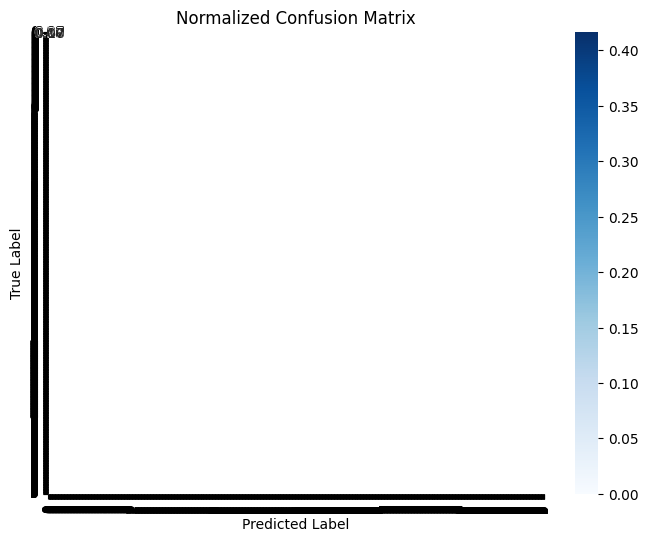

In [34]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# svm = SVC(gamma='auto', kernel='linear', probability=True)
# svm.fit(train_features, train_labels_1d) 
# y_pred = svm.predict(validation_features)

# # Evaluation
# precision = metrics.accuracy_score(validation_labels_1d, y_pred) * 100
# print("Accuracy with SVM: {0:.2f}%".format(precision))

# Calculate confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=train_labels_1d, yticklabels=train_labels_1d)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# cm , _ = confusion_matrix(svm, validation_features_pca, validation_labels_1d,display_labels=train_labels_1d, normalize='true')
# plt.title('Normalized confusion matrix')
# plt.show()

# # calculate the FPR and TPR for all thresholds of the classification
# probs = svm.predict_proba(validation_features_pca)[:,1]
# # probs = probs[:, 1]
# fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
# auc = metrics.roc_auc_score(y_test, probs)
# print("AUC: {:.2f}".format(auc))


1/1 [==============================] - 0s 31ms/step


C:\Users\irdina\AppData\Local\Temp\ipykernel_11740\2492364623.py:87: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


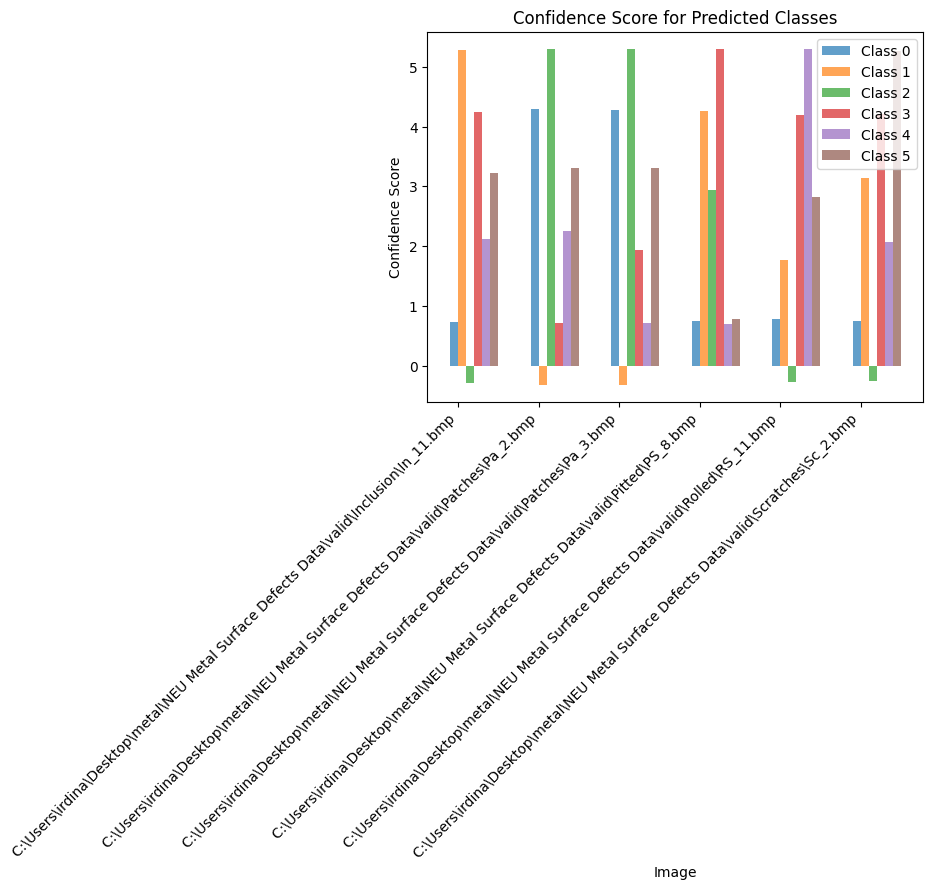

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import joblib

# Load pre-trained models and encoder
cnn_model = load_model('cnn_model.h5')
feature_extraction_model = load_model('feature_extraction_model.h5')
svm_model = joblib.load('svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((200, 200))
    image = np.array(image.convert('L')) / 255.0
    image = image.reshape(1, 200, 200, 1)
    return image

def evaluate_image(image_path, feature_extraction_model, svm_model, label_encoder):
    image_data = preprocess_image(image_path)

    # Extract features using the CNN model
    cnn_features = feature_extraction_model.predict(image_data)
    cnn_features_flattened = cnn_features.flatten().reshape(1, -1)

    # Predict using the SVM model
    confidence_scores = svm_model.decision_function(cnn_features_flattened)[0]

    # Decode the predicted class labels
    predicted_classes = label_encoder.inverse_transform(svm_model.predict(cnn_features_flattened))

    return predicted_classes, confidence_scores

# Initialize lists to store results
predicted_classes_list = []
confidence_scores_list = []
actual_classes_list = []  # Add a list to store actual classes
selected_images = [
    r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Inclusion\In_11.bmp',
    r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Patches\Pa_2.bmp', 
    r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Patches\Pa_3.bmp', 
    r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Pitted\PS_8.bmp',
    r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Rolled\RS_11.bmp',
    r'C:\Users\irdina\Desktop\metal\NEU Metal Surface Defects Data\valid\Scratches\Sc_2.bmp'  
    ]

# Evaluate the model on each selected image
for image_path in selected_images:
    predicted_classes, confidence_scores = evaluate_image(image_path, feature_extraction_model, svm_model, label_encoder)
    
    # Extract actual class from the image path
    actual_class = image_path.split("\\")[-2]

    # Append results to lists
    predicted_classes_list.append(predicted_classes)
    confidence_scores_list.append(confidence_scores)
    actual_classes_list.append(actual_class)

# Convert confidence_scores_list to a numpy array
confidence_scores_array = np.array(confidence_scores_list)

# Increase the width size of the bars
bar_width = 0.1  # Set your desired bar width

# Plot the results
fig, ax = plt.subplots()
index = np.arange(len(selected_images))  # Use np.arange to create an array of indices

# Plotting confidence scores
for i, confidence_scores in enumerate(confidence_scores_array.T):  # Transpose the array
    ax.bar(index + i * bar_width, confidence_scores, bar_width, label=f'Class {i}', alpha=0.7)

# Adding labels
ax.set_xlabel('Image')
ax.set_ylabel('Confidence Score')
ax.set_title('Confidence Score for Predicted Classes')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(selected_images, rotation=45, ha='right')
ax.legend()

# Display the predicted classes and actual classes on top of the bars
# for i, (predicted_class, actual_class) in enumerate(zip(predicted_classes_list, actual_classes_list)):
#     ax.text(i * bar_width, confidence_scores_array.max() + 0.1, f'Predicted: {predicted_class[0]}\nActual: {actual_class}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
